In [147]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report



# Micro-Credit Defaulter Model



## Problem Statement: 
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


In [148]:
pd.set_option('display.max_columns', None)


In [149]:
data = pd.read_csv('Data_file.csv')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# features :

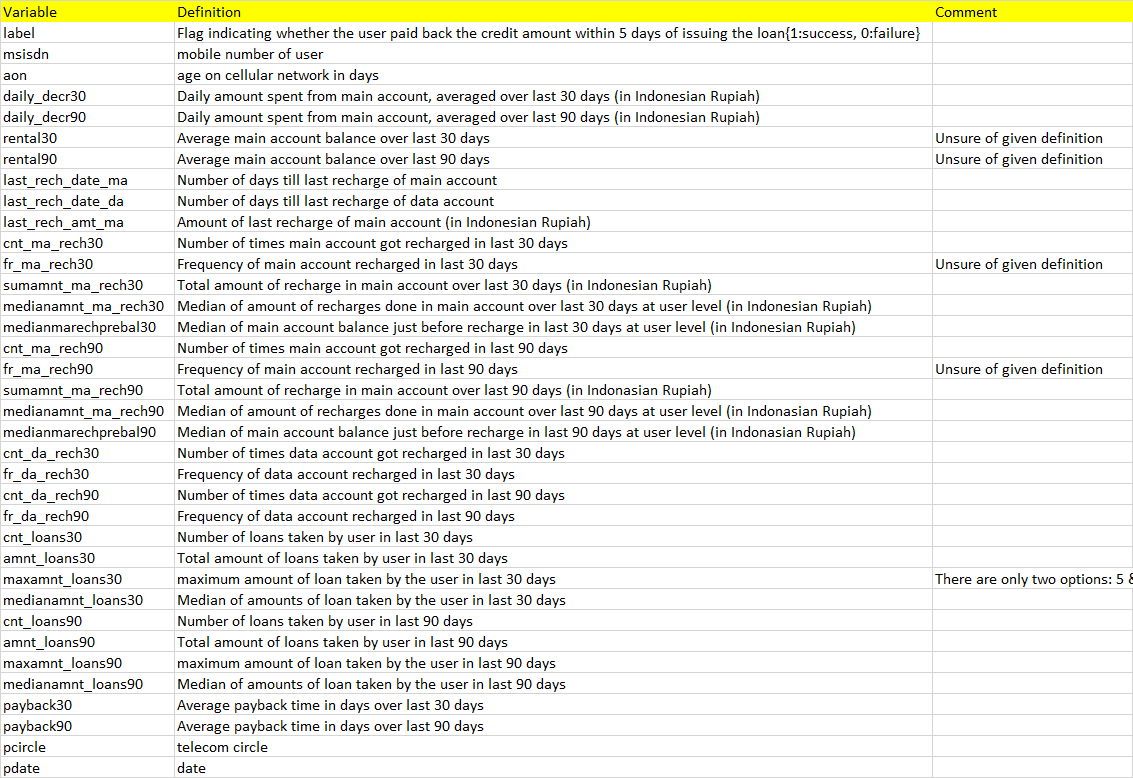

 
 # Checking shape of the data

In [150]:
data.shape

(209593, 37)

# top 7   data

In [151]:
data.head(7)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05


#  last 7 days

In [152]:
data.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


#  sample data

In [153]:
data.sample(17)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
89449,89450,1,73475I85320,1367.0,9297.000000,11955.340000,3691.13,3065.33,15.0,0.0,4048,1,0.0,4048.0,4048.0,249.50,3,19,20048,8000.0,249.50,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-04
44921,44922,1,34710I90840,155.0,15050.000000,15215.000000,13543.30,13784.20,7.0,0.0,10000,4,3.0,13848.0,1539.0,56.50,6,10,16157,1539.0,52.00,0.0,0.0,0,0,4,24,6.0,0.0,8.0,48,6,0.0,10.000000,7.142857,UPW,2016-08-02
2783,2784,1,57014I70379,160.0,73.666667,73.666667,3082.82,3082.82,15.0,0.0,1539,1,0.0,1539.0,1539.0,302.00,1,0,1539,1539.0,302.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-26
72220,72221,1,34266I89237,1917.0,77858.886333,78696.590000,23394.66,27689.27,1.0,0.0,2309,30,1.0,73384.0,2309.0,12.05,63,1,157057,2309.0,13.05,0.0,0.0,0,0,22,132,6.0,0.0,51.0,306,6,0.0,1.608696,1.411765,UPW,2016-07-29
124009,124010,1,01917I85340,693.0,4.760000,4.760000,277.86,277.86,0.0,0.0,0,0,0.0,0.0,0.0,0.00,0,0,0,0.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-03
133215,133216,1,27028I88689,274.0,8.454000,8.454000,172.50,172.50,38.0,0.0,2320,0,0.0,0.0,0.0,0.00,2,0,3267,1633.5,364.50,0.0,0.0,0,0,1,6,6.0,1.0,1.0,6,6,1.0,0.000000,0.000000,UPW,2016-06-03
9578,9579,1,25084I70377,169.0,7.200000,7.200000,730.89,730.89,21.0,0.0,773,1,0.0,773.0,773.0,28.00,1,0,773,773.0,28.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-27
158531,158532,0,98030I90583,1312.0,3310.000000,3310.000000,299.70,299.70,5.0,0.0,2309,1,0.0,2309.0,2309.0,6.20,1,0,2309,2309.0,6.20,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-14
142606,142607,1,83851I70373,293.0,4036.000000,4036.000000,8076.00,10818.90,4.0,0.0,1924,1,0.0,1924.0,1924.0,0.00,1,0,1924,1924.0,0.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-01
133360,133361,1,60700I90587,1216.0,122.989000,122.989000,1883.84,1883.84,11.0,0.0,1539,5,6.0,7695.0,1539.0,40.00,6,41,9242,1539.0,30.00,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,7.000000,7.000000,UPW,2016-06-29


# Checking data types

In [154]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

# Describing data

In [155]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Checking null data

In [156]:
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

# converti ng date type

In [157]:
data["pdate"]= pd.to_datetime(data["pdate"] , dayfirst=True)

In [158]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

In [160]:
data['Year']=  data['pdate'].apply(lambda x:x.year)
data['Month']=  data['pdate'].apply(lambda x:x.month)
data['Day']=  data['pdate'].apply(lambda x:x.day)

In [161]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20,2016,7,20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10,2016,8,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19,2016,8,19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06,2016,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22,2016,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17,2016,6,17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12,2016,6,12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29,2016,7,29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25,2016,7,25


# encodin

In [162]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [163]:
data["pcircle"] = oe.fit_transform(data["pcircle"].values.reshape(-1,1))

In [164]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate,Year,Month,Day
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0.0,2016-07-20,2016,7,20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0.0,2016-08-10,2016,8,10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0.0,2016-08-19,2016,8,19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0.0,2016-06-06,2016,6,6
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0.0,2016-06-22,2016,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0.0,2016-06-17,2016,6,17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0.0,2016-06-12,2016,6,12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0.0,2016-07-29,2016,7,29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0.0,2016-07-25,2016,7,25


# Checking the correlation of the data

In [165]:
corr = data.corr()
corr

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,Year,Month,Day
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,0.003320,0.003181,0.000123,-0.001371,0.001258,0.002329,-0.000249,0.000523,-0.000298,-0.001947,0.000888,-0.002504,-0.001324,-0.002827,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411,NaN,NaN,0.003205,-0.002045
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,NaN,NaN,0.154949,0.006825
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,NaN,NaN,-0.001863,0.000662
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,NaN,NaN,0.518664,0.006477
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,NaN,NaN,0.539410,-0.021508
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,NaN,NaN,0.365699,0.036537
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,NaN,NaN,0.429407,0.008941
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,NaN,NaN,-0.001207,0.000560
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,NaN,NaN,-0.001800,0.000631
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0

<AxesSubplot:>

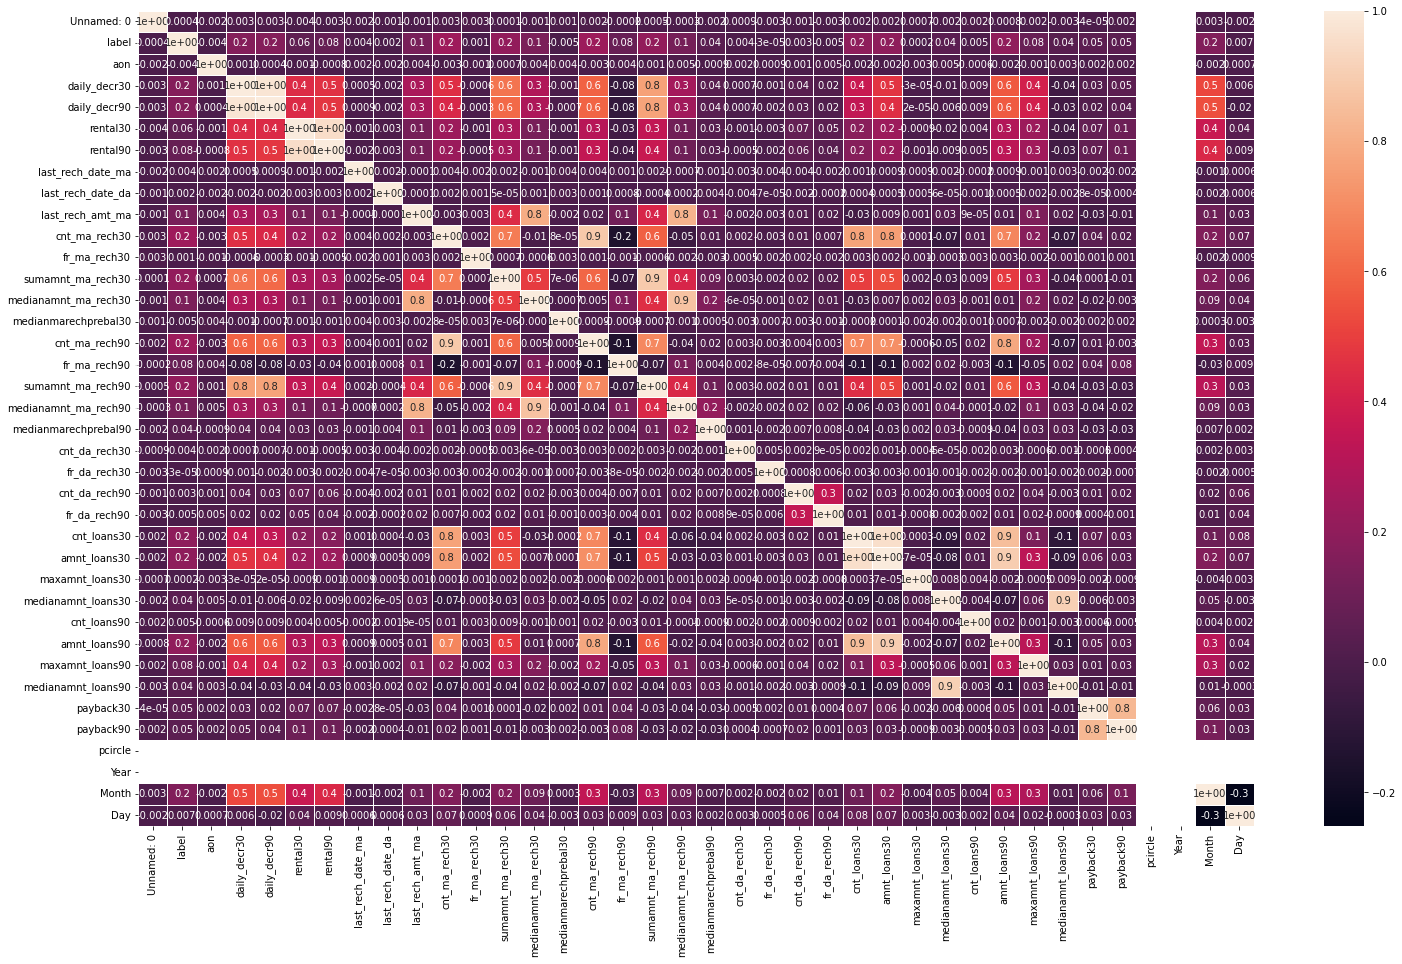

In [166]:
plt.figure(figsize =  (25,15))
sns.heatmap(corr,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.1')


In [167]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if (data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

daily_decr90
rental90
medianamnt_ma_rech30
cnt_ma_rech90
sumamnt_ma_rech90
sumamnt_ma_rech90
sumamnt_ma_rech90
medianamnt_ma_rech90
medianamnt_ma_rech90
cnt_loans30
amnt_loans30
amnt_loans30
amnt_loans30
amnt_loans90
amnt_loans90
amnt_loans90
medianamnt_loans90
payback90


In [168]:
data.drop(["sumamnt_ma_rech90" , "medianamnt_ma_rech90" ]  , inplace =  True , axis = 1)

In [169]:
data.drop(["amnt_loans90" , "amnt_loans30" ]  , inplace =  True , axis = 1)

In [170]:
data.drop([  "rental30" ]  , inplace =  True , axis = 1)

In [171]:
data.drop([  "daily_decr30" ]  , inplace =  True , axis = 1)

In [172]:
data.drop([  "payback90" ]  , inplace =  True , axis = 1)

In [173]:
data.drop([  "cnt_ma_rech30" ]  , inplace =  True , axis = 1)

In [174]:
data.drop([  "pcircle" ]  , inplace =  True , axis = 1)

In [175]:
data.drop([  "Year" ]  , inplace =  True , axis = 1)

In [176]:
data.drop([  "pdate" ]  , inplace =  True , axis = 1)

In [177]:
data.drop([  "msisdn" ]  , inplace =  True , axis = 1)

In [178]:
data.drop([  "Unnamed: 0" ]  , inplace =  True , axis = 1)

In [ ]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if (data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

In [32]:
corr = data.corr()
corr

,label,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,Month,Day
label,1.000000,-0.003785,0.166150,0.075521,0.003728,0.001711,0.131804,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.000248,0.044589,0.004733,0.084144,0.035747,0.048336,0.154949,0.006825
aon,-0.003785,1.000000,0.000374,-0.000790,0.001692,-0.001693,0.004256,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.002764,0.004664,-0.000611,-0.001191,0.002771,0.001940,-0.001863,0.000662
daily_decr90,0.166150,0.000374,1.000000,0.471730,0.000908,-0.001886,0.264131,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.000025,-0.005591,0.009446,0.397251,-0.034686,0.019400,0.539410,-0.021508
rental90,0.075521,-0.000790,0.471730,1.000000,-0.001688,0.002794,0.121416,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,-0.001411,-0.009467,0.005141,0.251029,-0.034122,0.067110,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000908,-0.001688,1.000000,0.001790,-0.000147,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000928,0.001835,-0.000225,-0.001123,0.002771,-0.002233,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001886,0.002794,0.001790,1.000000,-0.000149,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000503,0.000061,-0.000972,0.001524,-0.002239,0.000077,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.264131,0.121416,-0.000147,-0.000149,1.000000,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.001000,0.028370,0.000093,0.148460,0.021004,-0.027369,0.096919,0.028883
fr_ma_rech30,0.001330,-0.001163,-0.000343,-0.000503,-0.001629,0.001158,0.002876,1.000000,0.000714,-0.000579,0.002613,0.001220,-0.001245,-0.002826,-0.000511,-0.001715,0.001574,-0.001925,0.002666,-0.001100,-0.000331,0.003368,-0.001890,-0.001292,0.001455,-0.001682,0.000927
sumamnt_ma_rech30,0.202828,0.000707,0.603886,0.259709,0.002105,0.000046,0.440821,0.000714,1.000000,0.489200,0.000007,0.596478,-0.071089,0.090502,0.002537,-0.001578,0.019213,0.017255,0.491864,0.001633,-0.034460,0.009419,0.257705,-0.042244,0.000112,0.155682,0.056898
medianamnt_ma_rech30,0.141490,0.004306,0.282960,0.120242,-0.001358,0.001037,0.794646,-0.000579,0.489200,1.000000,-0.000737,0.005309,0.149655,0.156028,-0.000060,-0.001479,0.016727,0.013734,-0.029789,0.001985,0.032477,-0.001143,0.159613,0.022692,-0.018398,0.093037,0.039341


<AxesSubplot:>

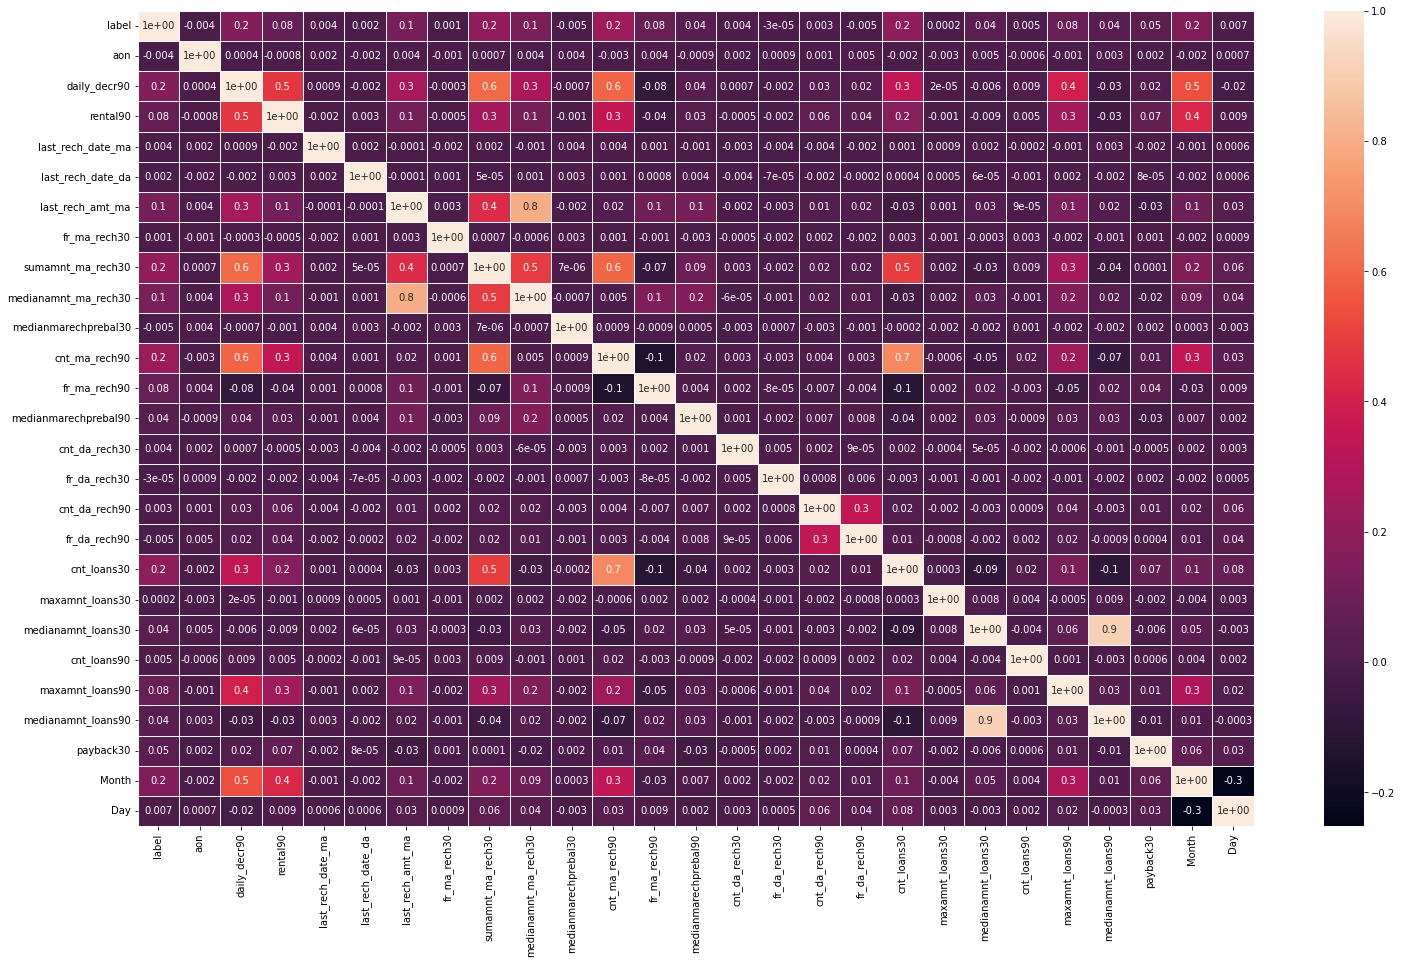

In [33]:
plt.figure(figsize =  (25,15))
sns.heatmap(corr,annot = True,linewidth = 0.5 ,linecolor = "white", fmt ='0.1')


In [60]:
data.shape

(209593, 29)

In [35]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr90', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'pdate', 'Month', 'Day'],
      dtype='object')

# Bivariate analysis


<AxesSubplot:xlabel='label', ylabel='rental90'>

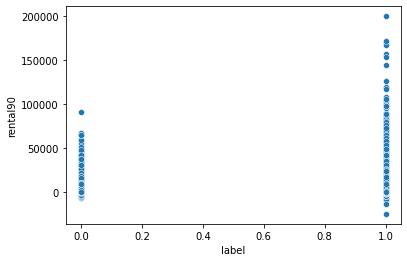

In [44]:
sns.scatterplot( data = data , x = "label" , y = "rental90" )

<AxesSubplot:xlabel='label', ylabel='Month'>

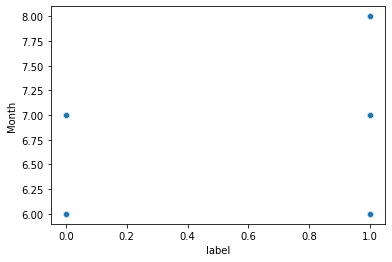

In [45]:
sns.scatterplot( data = data , x = "label" , y = "Month" )

<AxesSubplot:xlabel='label', ylabel='medianamnt_loans30'>

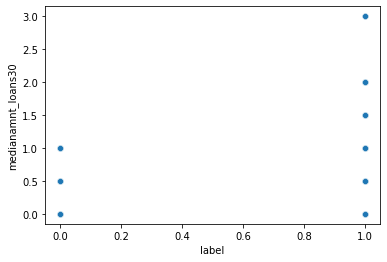

In [47]:
sns.scatterplot( data = data , x = "label" , y = "medianamnt_loans30" )

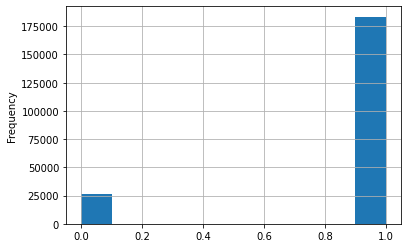

In [48]:
data["label"].plot(kind='hist' , grid = True)
plt.show()

In [50]:
# we can see most users have paid back  the  loan  amount 

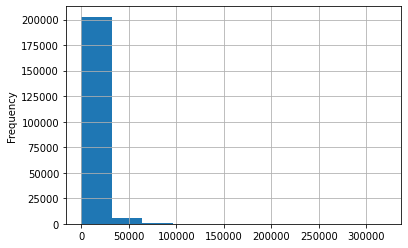

In [51]:
data["daily_decr90"].plot(kind='hist' , grid = True)
plt.show()

In [111]:
data

,Unnamed: 0,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,pdate,Month,Day
0,1,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,21.0,3078.0,1539.0,7.50,2,21,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,6,0.0,29.000000,2016-07-20,7,20
1,2,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,0.0,5787.0,5787.0,61.04,1,0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,0.0,0.000000,2016-08-10,8,10
2,3,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,0.0,1539.0,1539.0,66.32,1,0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,0.0,0.000000,2016-08-19,8,19
3,4,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0.0,0.0,0.0,0.00,1,0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,6,0.0,0.000000,2016-06-06,6,6
4,5,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,2.0,20029.0,2309.0,29.00,8,2,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,6,0.0,2.333333,2016-06-22,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,1089.19,1.0,0.0,4048,2.0,10404.0,3178.0,91.81,3,2,91.81,0.0,0.0,0,0,2,6.0,0.0,2.0,6,0.0,1.000000,2016-06-17,6,17
209589,209590,1,95583I84455,1075.0,36.936000,1728.36,4.0,0.0,773,1.0,3092.0,773.0,161.30,6,2,111.80,0.0,0.0,0,0,3,6.0,0.0,3.0,6,0.0,1.000000,2016-06-12,6,12
209590,209591,1,28556I85350,1013.0,11904.350000,8893.20,3.0,0.0,1539,8.0,9334.0,1539.0,51.13,11,5,47.13,0.0,0.0,0,0,4,12.0,0.0,6.0,12,0.0,4.000000,2016-07-29,7,29
209591,209592,1,59712I82733,1732.0,12574.370000,984.58,2.0,38.0,773,4.0,12154.0,773.0,164.00,6,4,100.00,0.0,0.0,1,0,2,12.0,0.0,3.0,12,0.0,0.000000,2016-07-25,7,25


#   checking outliers

In [179]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(data))
data.shape

(209593, 27)

In [180]:
threshold = 5
print(np.where(z>5))

(array([    30,     53,     65, ..., 209531, 209533, 209576], dtype=int64), array([4, 4, 1, ..., 5, 4, 1], dtype=int64))


In [181]:
 len(np.where(z>5)[0])

20070

In [182]:
data = data[(z<5).all(axis=1)]

In [183]:
data.shape

(192200, 27)

## seperating x / input and y / output data

In [197]:

x = data.drop(["label"] , axis = 1)

In [199]:
y = data["label"]

# checking skewness

In [200]:
x.skew ()

aon                      0.947368
daily_decr90             2.475474
rental90                 2.628536
last_rech_date_ma        3.097747
last_rech_date_da        9.922870
last_rech_amt_ma         2.218085
fr_ma_rech30             2.009293
sumamnt_ma_rech30        2.109481
medianamnt_ma_rech30     2.439949
medianmarechprebal30    11.050880
cnt_ma_rech90            1.881816
fr_ma_rech90             2.178582
medianmarechprebal90     4.850812
cnt_da_rech30           37.525827
fr_da_rech30            93.940220
cnt_da_rech90            7.421745
fr_da_rech90            72.543172
cnt_loans30              1.909931
maxamnt_loans30         40.791367
medianamnt_loans30       4.080296
cnt_loans90             71.214635
maxamnt_loans90          1.740778
medianamnt_loans90       4.460356
payback30                3.667925
Month                    0.370380
Day                      0.206546
dtype: float64

In [203]:
from sklearn.preprocessing import  power_transform
x =  power_transform(x,method = 'yeo-johnson')

In [212]:
x = pd.DataFrame(x)


In [205]:
x.skew()

0      0.304285
1     -2.334126
2      0.351385
3      0.126229
4    -56.185336
5     -0.099610
6      0.135583
7     -0.372382
8     -0.223953
9      2.089037
10    -0.010393
11     0.141637
12     1.288479
13     9.262220
14    80.023539
15     6.651760
16    61.365190
17     0.038600
18    -0.771160
19     3.516445
20     0.095289
21     0.381454
22     3.855422
23     0.299132
24     0.086660
25    -0.155077
dtype: float64

# VIF

In [206]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor
def calc_vif(x):
    vif= pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return(vif)
calc_vif(x)

,variables,VIF
0,0,1.031085
1,1,6.598434
2,2,1.395617
3,3,1.567204
4,4,1.718835
5,5,4.287398
6,6,2.076791
7,7,13.562280
8,8,7.370947
9,9,2.733400


# scaling

In [207]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler ()

In [208]:
x = mms.fit_transform(x) 

In [213]:
x.skew()

0      0.304285
1     -2.334126
2      0.351385
3      0.126229
4    -56.185336
5     -0.099610
6      0.135583
7     -0.372382
8     -0.223953
9      2.089037
10    -0.010393
11     0.141637
12     1.288479
13     9.262220
14    80.023539
15     6.651760
16    61.365190
17     0.038600
18    -0.771160
19     3.516445
20     0.095289
21     0.381454
22     3.855422
23     0.299132
24     0.086660
25    -0.155077
dtype: float64

# over sampling

In [215]:
data["label"].value_counts()

1    167918
0     24282
Name: label, dtype: int64

In [218]:
from imblearn.over_sampling import RandomOverSampler

In [219]:

smt =  RandomOverSampler()

x_train,y_train  = smt.fit_resample(x,y)
y_train.value_counts()


0    167918
1    167918
Name: label, dtype: int64

In [220]:
x = x_train
y  = y_train

In [221]:
x.shape

(335836, 26)

In [222]:
y.shape

(335836,)

# training

In [224]:

from sklearn.linear_model import LogisticRegression
ln =  LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)  


#  logistic regression

In [227]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    ln.fit(x_train,y_train)
    pred_train = ln.predict(x_train)
    pred_test = ln.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
at random_state =   0
training score at 0 is  76.96860065210595
 testing  score is  0 is 77.00839685564554 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  76.97083389164322
 testing  score is  1 is 76.820807527394 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  76.9027200857564
 testing  score is  2 is 77.04115054787994 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  77.0262926734855
 testing  score is  3 is 76.62875178656503 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  76.93994074471094
 testing  score is  4 is 77.03966174368747 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  76.9518513555764
 testing  score is  5 is 76.9399118627918 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  76.96934506528504
 testing  score is  6 

at random state 55 model preforms best
at random_state =   55
training score at 55 is  76.98051126297139
 testing  score is  55 is 76.70170319199619 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  76.9388241249423
 testing  score is  56 is 76.75827775131015 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  76.99837717926958
 testing  score is  57 is 76.76721057646499 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  76.96562299938958
 testing  score is  58 is 76.86696045736065 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  76.9511069423973
 testing  score is  59 is 76.8863149118628 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  77.0181041285155
 testing  score is  60 is 76.64066222010482 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  76.94701266

In [233]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 75)  
ln.fit(x_train,y_train)
pred_train = ln.predict(x_train)
pred_test = ln.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  0.7695780666100913
accuracy for  testing  0.7686844926155312


In [234]:

print(classification_report(y_test, pred_test))
print(confusion_matrix ( y_test, pred_test ),"\n")


              precision    recall  f1-score   support

           0       0.77      0.77      0.77     33519
           1       0.77      0.77      0.77     33649

    accuracy                           0.77     67168
   macro avg       0.77      0.77      0.77     67168
weighted avg       0.77      0.77      0.77     67168

[[25693  7826]
 [ 7711 25938]] 



#  xtra tree forest classifier

In [242]:
from sklearn.ensemble import ExtraTreesClassifier
et =  ExtraTreesClassifier()

In [237]:
for i in range (0,100):
    x_train,x_test,y_train,y_test = train_test_split( x , y , random_state = i , test_size = .2)
    et.fit(x_train,y_train)
    pred_train = et.predict(x_train)
    pred_test = et.predict(x_test)
    print("at random state",i,"model preforms best")
    print("at random_state =  " ,i)
    print("training score at" ,i, "is " ,accuracy_score(y_train, pred_train)*100)
    print(" testing  score is " ,i, "is" , accuracy_score(y_test, pred_test)*100,"\n")

at random state 0 model preforms best
at random_state =   0
training score at 0 is  99.99776676046272
 testing  score is  0 is 98.5707479752263 

at random state 1 model preforms best
at random_state =   1
training score at 1 is  99.99776676046272
 testing  score is  1 is 98.57223677941877 

at random state 2 model preforms best
at random_state =   2
training score at 2 is  99.99851117364182
 testing  score is  2 is 98.57968080038113 

at random state 3 model preforms best
at random_state =   3
training score at 3 is  99.99776676046272
 testing  score is  3 is 98.5379942829919 

at random state 4 model preforms best
at random_state =   4
training score at 4 is  99.99888338023136
 testing  score is  4 is 98.51268461171986 

at random state 5 model preforms best
at random_state =   5
training score at 5 is  99.99776676046272
 testing  score is  5 is 98.49184135302525 

at random state 6 model preforms best
at random_state =   6
training score at 6 is  99.99813896705227
 testing  score is

at random state 55 model preforms best
at random_state =   55
training score at 55 is  99.99851117364182
 testing  score is  55 is 98.43824440209623 

at random state 56 model preforms best
at random_state =   56
training score at 56 is  99.99776676046272
 testing  score is  56 is 98.40995712243927 

at random state 57 model preforms best
at random_state =   57
training score at 57 is  99.99813896705227
 testing  score is  57 is 98.54543830395427 

at random state 58 model preforms best
at random_state =   58
training score at 58 is  99.99851117364182
 testing  score is  58 is 98.57372558361124 

at random state 59 model preforms best
at random_state =   59
training score at 59 is  99.99813896705227
 testing  score is  59 is 98.48141972367794 

at random state 60 model preforms best
at random_state =   60
training score at 60 is  99.99813896705227
 testing  score is  60 is 98.53055026202954 

at random state 61 model preforms best
at random_state =   61
training score at 61 is  99.9985

In [243]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 75)  
et.fit(x_train,y_train)
pred_train = et.predict(x_train)
pred_test = et.predict(x_test)
print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

accuracy for  training  0.9999851117364181
accuracy for  testing  0.9848141972367794


In [244]:

print(classification_report(y_test, pred_test))
print(confusion_matrix ( y_test, pred_test ),"\n")


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     33519
           1       1.00      0.97      0.98     33649

    accuracy                           0.98     67168
   macro avg       0.99      0.98      0.98     67168
weighted avg       0.99      0.98      0.98     67168

[[33461    58]
 [  962 32687]] 



##  Extra tree has  0.985111958075274  accuracy 

# # hyper parameter tuning  of  extra tree classifier 

In [251]:

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score


In [239]:
param_grid = {'criterion' : ["gini", "entropy", "log_loss"],"max_features" : ["sqrt", "log2", "auto"]}
from sklearn.model_selection import GridSearchCV

et =  ExtraTreesClassifier()
clf = GridSearchCV(et,param_grid)
clf.fit(x_train , y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', 'auto']})

In [240]:
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2'}


In [245]:
et = ExtraTreesClassifier(criterion =  "gini" ,max_features =  'log2' )

In [254]:
et.fit(x_train , y_train)
pred_train = et.predict(x_train)
pred_test = et.predict(x_test)
print("training score at" , "is " ,accuracy_score(y_train, pred_train)*100)
print(" testing  score is ", "is" , accuracy_score(y_test, pred_test)*100,"\n")



print("accuracy for  training ",accuracy_score(y_train, pred_train))
print("accuracy for  testing ", accuracy_score(y_test, pred_test))

training score at is  99.99851117364182
 testing  score is  is 98.51863982848977 

accuracy for  training  0.9999851117364181
accuracy for  testing  0.9851863982848976


In [256]:


from sklearn.model_selection import cross_val_score
for j in range(2,10):
    ls_score = (cross_val_score(et,x,y,cv =  j ))
    lsc =  ls_score.mean()
    print("at cv :" , j)
    print("cross validation score is :" , lsc*100)
    print("\n")

at cv : 2
cross validation score is : 97.50294786741148


at cv : 3
cross validation score is : 98.24944360172


at cv : 4
cross validation score is : 98.4763396419681


at cv : 5
cross validation score is : 98.56060715881621


at cv : 6
cross validation score is : 98.63415483507791


at cv : 7
cross validation score is : 98.69132565547302


at cv : 8
cross validation score is : 98.69996077294076


at cv : 9
cross validation score is : 98.7202087565323




###  cv : 9
### cross validation score is : 98.7202087565323

# we can conclude the best  performing model is extra tree classifier 

In [257]:

from sklearn.metrics  import roc_curve,auc

y_precict_proba = clf.predict_proba(x_test)[:,1]
fpr , tpr , threshold = roc_curve(y_test,y_precict_proba )
roc_auc  =  auc(fpr,tpr)
roc_auc

0.9996271871207996

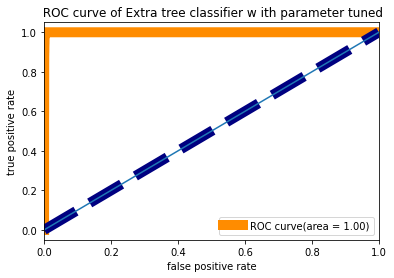

In [258]:
plt.figure()
plt.plot(fpr,tpr,color ="darkorange",lw = 10, label = "ROC curve(area = %0.2f)"%roc_auc)
plt.plot([0,1],[0,1]  , color = "navy" , lw = 10 ,  linestyle = "--" )
plt.xlim ([0.0 ,1.0] )
plt.plot([0.0 , 1.0])
plt.xlabel("false positive rate" )
plt.ylabel("true positive rate" )
plt.title (" ROC curve of Extra tree classifier w ith parameter tuned")
plt.legend(loc="lower right")


plt.show()

In [259]:
import pickle
filename = "credit.pkl"
pickle.dump(et, open(filename,"wb"))